#### 1. Dataframe basics

#### 1.1. Import pandas and reffered the package as pd + Load "telecom_churn.csv" and assign in to the variable df <span style= color:#0033cc>(3 points)</span>

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 1.2 Return the column labels/names <span style= color:#0033cc>(2 points)</span>

In [6]:
df.columns.values.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

#### 1.3 Print the df shape <span style= color:#0033cc>(3 points)</span>

In [7]:
df.shape

(3333, 20)

#### 2. What is the total day calls given by state and area code? 

#### 2.1 Group the df by state and area code (assign it to grouped variable). <span style= color:#0033cc>(5 points)</span>

In [8]:
grouped_data = df.groupby(['State','Area code'])
grouped_data

#### 2.2 Use agg with the desired function sum to get the final answer (assign it to telecom_agg variable).<span style= color:#0033cc>(5 points)</span>

In [9]:
grouped_data=grouped_data['Total day charge'].agg(["sum"])
grouped_data

sum
State Area code         
AK    408         414.09
      415         759.69
      510         403.16
AL    408         807.69
      415        1247.27
...                  ...
WV    415        1537.86
      510         972.39
WY    408         489.95
      415        1259.76
      510         608.72

[153 rows x 1 columns]

#### 2.3 Reset the group by index <span style= color:#0033cc>(3 points)</span>

In [69]:
grouped_data.reset_index()

,State,Area code,sum
0,AK,408,414.09
1,AK,415,759.69
2,AK,510,403.16
3,AL,408,807.69
4,AL,415,1247.27
...,...,...,...
148,WV,415,1537.86
149,WV,510,972.39
150,WY,408,489.95
151,WY,415,1259.76


#### 2.4 Use head function to review the first 10 telecom_agg rows <span style= color:#0033cc>(3 points)</span>

In [10]:
grouped_data.head(10)

sum
State Area code         
AK    408         414.09
      415         759.69
      510         403.16
AL    408         807.69
      415        1247.27
      510         474.76
AR    408         371.83
      415         823.32
      510         451.55
AZ    408         458.20

#### 3. Users Churn rate

#### 3.1 Change "Churn" column type to an integer: <span style= color:#0033cc>(3 points)</span>

In [11]:
df['Churn'].replace({True:1,False:0})

C:\Users\The user\AppData\Local\Temp\ipykernel_74188\3365943578.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({True:1,False:0})


0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

#### 3.2 what is the users "churn rate" in our dataframe? <span style= color:#0033cc>(5 points)</span>
Hint: the churn rate formula can be calculated as the "number of churned" divided by the "total number of customers".

In [ ]:
churn_rate = df['Churn'].sum() / len(df['Churn'])
churn_rate

#### 3.3  How the charn rate can affect on the company? <span style= color:#0033cc>(3 points)</span>


df['churn_rate'] = (df['Churn'].sum()) / (len(df['Churn']))
df

#### 3.4 How much time (on average) do churned users spend on the phone during daytime? <span style= color:#0033cc>(5 points)</span>
Hint: filter churn column when the value of churn equal to 1

In [43]:
avarageTime= df[df['Churn']]['Total day minutes'].mean()
avarageTime

206.91407867494823

#### 3.5 What is the maximum length of international calls among loyal users who do not have an international plan? ('International plan' == 'No') <span style= color:#0033cc>(5 points)</span>
Hint: 2 filters conditions,churn equal to 0 and international plan equal to no

In [19]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

#### 4. Select top 3 international plan subscribers and non subscribers with the most intl calls

#### 4.1. Build a function top which attributes df, n (for the top n) and column. In this function use sort_values to sort the values in the column specified. <span style= color:#0033cc>(10 points)</span>
Note: Do not apply the function on the whole data frame (e.i. top(df, n=3)) as the output will be the top 3 regardless of subscribers and non-subscribers.

In [23]:
def top(df, n, column):
    return df.sort_values(by=column, ascending=False).head(n)

s= df[df['International plan'] == 'Yes']
ns = df[df['International plan'] == 'No']
top_s = top(s, 3, 'Total intl calls')
top_ns = top(ns, 3, 'Total intl calls')
top_s
top_ns

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
22,AZ,130,415,No,No,0,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,9.5,19,2.57,0,False
377,ND,79,408,No,No,0,205.7,123,34.97,214.5,108,18.23,226.1,106,10.17,6.7,18,1.81,1,False
982,ND,84,415,No,Yes,33,159.1,106,27.05,149.8,101,12.73,213.4,108,9.60,13.0,18,3.51,1,False


#### 4.2. Group the df dataframe by 'International plan' and use apply(top) to apply this function. <span style= color:#0033cc>(5 points)</span>

In [25]:
def top(df, n, column):
    return df.sort_values(by=column, ascending=False).head(n)



In [27]:
topP = df.groupby('International plan').apply(top, n=3, column='Total intl minutes')
topP

C:\Users\The user\AppData\Local\Temp\ipykernel_74188\2242980662.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topP = df.groupby('International plan', as_index=False).apply(top, n=3, column='Total intl minutes')


State  Account length  Area code International plan Voice mail plan  \
0 314     ID             128        408                 No              No   
  1816    OR              53        415                 No              No   
  2816    ID             130        415                 No              No   
1 115     ME              36        510                Yes             Yes   
  1420    MI              81        415                Yes              No   
  214     FL              70        510                Yes              No   

        Number vmail messages  Total day minutes  Total day calls  \
0 314                       0              125.2               99   
  1816                      0              184.8               98   
  2816                      0              263.7              113   
1 115                      42              196.8               89   
  1420                      0              149.4               68   
  214                       0              226.7               98   

        Total day charge  Total eve minutes  Total eve calls  \
0 314              21.28              205.4              107   
  1816             31.42              216.4              125   
  2816             44.83              186.5              103   
1 115              33.46              254.9              122   
  1420             25.40              171.9               98   
  214              38.54              228.1              115   

        Total eve charge  Total night minutes  Total night calls  \
0 314              17.46                254.4                111   
  1816             18.39                141.1                116   
  2816             15.85                195.3                 99   
1 115              21.67                138.3                126   
  1420             14.61                214.5                 97   
  214              19.39                 73.2                 93   

        Total night charge  Total intl minutes  Total intl calls  \
0 314                11.45                18.9                 2   
  1816                6.35                18.4                 3   
  2816                8.79                18.3                 6   
1 115                 6.22                20.0                 6   
  1420                9.65                17.9                 3   
  214                 3.29                17.6                 4   

        Total intl charge  Customer service calls  Churn  
0 314                5.10                       0  False  
  1816               4.97                       2  False  
  2816               4.94                       1   True  
1 115                5.40                       0   True  
  1420               4.83                       3   True  
  214                4.75                       2   True

#### 5. pd.crosstab

#### 5.1 how the observations in our sample are normalized (divide each value by the sum of the values) in the context of two variables - Churn and Voice mail plan. To do so, build a contingency table using the crosstab method. <span style= color:#0033cc>(6 points)</span>
Hint: To normalize using all values, simply set normalize=True

In [29]:
crosstab_table = pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)
crosstab_table

Voice mail plan,No,Yes
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


#### 5.2 What is the conclustion of most of users regarding voice mail usage? <span style= color:#0033cc>(4 points)</span>

רוב במתמשים לא בעד שימוש בדואר קולי

#### 6. Columns calculations

#### 6.1 Add a column name 'total_charge', and get the total charge by sum all the charge columns <span style= color:#0033cc>(7 points)</span>

In [30]:
df['total_charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,57.53


####  6.2 Add a column name 'Day_charge_pct', and get day charge precentage of total charge by dividing the column 'Total day charge' by the column 'total_charge'. <span style= color:#0033cc>(7 points)</span>

In [31]:
df['Day_charge_pct'] = (df['Total day charge'] / df['total_charge']) * 100
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charge,Day_charge_pct
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,75.56,59.647962
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,59.24,46.370695
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,62.29,66.431209
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,66.80,76.197605
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,52.09,54.405836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,False,60.10,44.176373
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,False,63.53,61.844798
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,False,67.74,45.379392
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,139.2,137,6.26,5.0,10,1.35,2,False,57.53,63.184426


#### 7. Day charge percentage and state visualization

#### 7.1 Import matplotlib.pyplot and referred the package as plt <span style= color:#0033cc>(2 points)</span>

In [34]:
pip install matplotlib


  Using cached matplotlib-3.8.3-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.3-cp310-cp310-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl (186 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#### 7.2 create new string list with the name 'my_color' that contains the following colors names: red,green,orange,blue,yellow <span style= color:#0033cc>(4 points)</span>

In [37]:
my_color = ['red', 'green', 'orange', 'blue', 'yellow']
my_color

['red', 'green', 'orange', 'blue', 'yellow']

#### 7.3 Bar chart plot <span style= color:#0033cc>(10 points)</span>

1.Select first 5 rows of the dataframe (use df.iloc[]) 

2.Use <span style= color:blue>df.plot</span> function with kind='bar' and x='State' and y='Day_charge_pct' and color = my_colors to make a simple bar chart plot (of the day chart %).

3.Use <span style= color:blue>plt.xlabel("State Code")</span> and <span style= color:blue>plt.ylabel("Day Charge %")</span> to label the corresponding axes

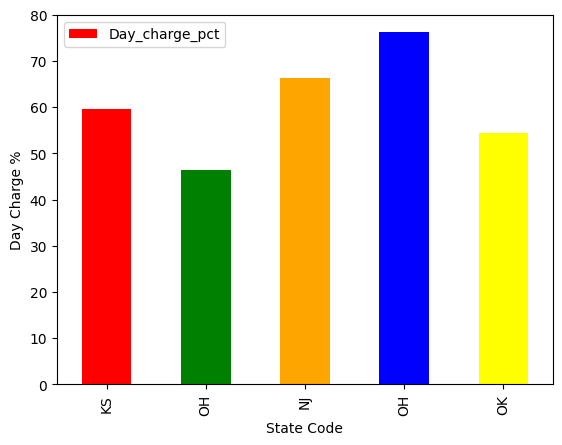

In [42]:
first_5 = df.iloc[:5]
first_5
first_5.plot(kind='bar', x='State', y='Day_charge_pct', color=my_color)
first_5
plt.xlabel("State Code")
plt.ylabel("Day Charge %")
plt.show()